In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.ticker import FuncFormatter

# Set the style for academic publication
plt.style.use('seaborn-whitegrid')
sns.set_context("paper", font_scale=1.3)
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.family'] = 'serif'

# Convert the data to a DataFrame
family_counts = {
    "sfone": 4622, "upatre": 3658, "wacatac": 3519, "wabot": 3454, "small": 3290,
    "mira": 1935, "berbew": 1710, "dinwod": 1586, "sillyp2p": 1604, "ceeinject": 1126,
    "musecador": 1027, "gandcrab": 952, "autoit": 912, "drolnux": 919, "smokeloader": 862,
    "unruy": 850, "gepys": 802, "qukart": 807, "ganelp": 751, "padodor": 700
}

df = pd.DataFrame(list(family_counts.items()), columns=['Family', 'Count'])

# Figure 1: Distribution of top malware families
plt.figure(figsize=(12, 6))
sns.barplot(data=df.head(15), x='Family', y='Count', color='darkblue', alpha=0.8)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Malware Family')
plt.ylabel('Number of Samples')
plt.title('Distribution of Top 15 Malware Families')
plt.tight_layout()
plt.savefig('malware_distribution.pdf', dpi=300, bbox_inches='tight')
plt.close()

# Figure 2: Sample size distribution (log scale)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Count', bins=30, color='darkblue', alpha=0.8)
plt.xscale('log')
plt.xlabel('Number of Samples (log scale)')
plt.ylabel('Number of Families')
plt.title('Distribution of Malware Family Sizes')
plt.tight_layout()
plt.savefig('malware_size_distribution.pdf', dpi=300, bbox_inches='tight')
plt.close()

# Figure 3: Cumulative distribution
df_sorted = df.sort_values('Count', ascending=False)
df_sorted['Cumulative_Percentage'] = df_sorted['Count'].cumsum() / df_sorted['Count'].sum() * 100

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(df_sorted) + 1), df_sorted['Cumulative_Percentage'], 
         color='darkblue', linewidth=2, marker='o', markersize=4)
plt.xlabel('Number of Families')
plt.ylabel('Cumulative Percentage of Samples')
plt.title('Cumulative Distribution of Malware Samples')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('malware_cumulative.pdf', dpi=300, bbox_inches='tight')
plt.close()

# Figure 4: Box plot with violin plot overlay
plt.figure(figsize=(12, 6))
sns.violinplot(data=df.head(15), x='Family', y='Count', color='lightblue', alpha=0.5)
sns.boxplot(data=df.head(15), x='Family', y='Count', width=0.2, 
            color='white', fliersize=0, showmeans=True, 
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"darkblue"})
plt.xticks(rotation=45, ha='right')
plt.xlabel('Malware Family')
plt.ylabel('Number of Samples')
plt.title('Distribution Characteristics of Top 15 Malware Families')
plt.tight_layout()
plt.savefig('malware_violin.pdf', dpi=300, bbox_inches='tight')
plt.close()

# LaTeX-compatible table of statistics
stats_df = df.describe()
with open('malware_stats.tex', 'w') as f:
    f.write(stats_df.to_latex(float_format=lambda x: '{:.2f}'.format(x)))

# Optional: Generate TikZ code for the cumulative distribution
with open('malware_tikz.tex', 'w') as f:
    f.write(r'\begin{tikzpicture}' + '\n')
    f.write(r'\begin{axis}[' + '\n')
    f.write(r'  xlabel={Number of Families},' + '\n')
    f.write(r'  ylabel={Cumulative Percentage of Samples},' + '\n')
    f.write(r'  grid=major,' + '\n')
    f.write(r'  width=12cm,' + '\n')
    f.write(r'  height=8cm' + '\n')
    f.write(r']' + '\n')
    
    # Write coordinates
    f.write(r'\addplot[thick,blue,mark=*] coordinates {' + '\n')
    for idx, row in df_sorted.reset_index().iterrows():
        f.write(f'({idx+1},{row["Cumulative_Percentage"]:.2f})')
    f.write(r'};' + '\n')
    
    f.write(r'\end{axis}' + '\n')
    f.write(r'\end{tikzpicture}')

print("Generated plots and files:")
print("- malware_distribution.pdf: Bar plot of top 15 families")
print("- malware_size_distribution.pdf: Log-scale distribution of family sizes")
print("- malware_cumulative.pdf: Cumulative distribution plot")
print("- malware_violin.pdf: Combined violin and box plot")
print("- malware_stats.tex: LaTeX table of summary statistics")
print("- malware_tikz.tex: TikZ code for cumulative distribution")

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import json
from collections import defaultdict
import sys
sys.path.append('/data/saranyav/gcn_new/Processing/')
from family_aggregator import MalwareBehaviorAggregator, BehavioralSimilarityComputer
import torch

def analyze_original_class_sizes():
    # Load data
    batch_dir = Path('/data/saranyav/gcn_new/bodmas_batches/train')
    family_sizes = defaultdict(int)
    
    # Count samples per original family
    print("Counting samples per family...")
    for batch_file in batch_dir.glob("batch_*.pt"):
        batch_graphs = torch.load(batch_file)
        for graph in batch_graphs:
            family_sizes[graph.family] += 1
    
    # Analyze distribution
    sizes = list(family_sizes.values())
    
    # Create visualization of original class sizes
    plt.figure(figsize=(12, 6))
    plt.hist(sizes, bins=range(1, max(sizes) + 2, 1), 
             alpha=0.7, color='#2e6aa6', edgecolor='black')
    plt.xlabel('Number of Samples in Original Family', fontsize=12)
    plt.ylabel('Number of Families', fontsize=12)
    plt.title('Distribution of Original Malware Family Sizes', fontsize=14, pad=20)
    
    # Add annotation for small families
    small_families = sum(1 for s in sizes if s <= 4)
    plt.text(0.7, 0.95, f'Families with ≤4 samples: {small_families} ({small_families/len(sizes)*100:.1f}%)',
             transform=plt.gca().transAxes, fontsize=10, 
             bbox=dict(facecolor='white', alpha=0.8))
    
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('original_family_sizes.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    return family_sizes

def analyze_behavioral_similarities():
    # Load behavioral features
    aggregator = MalwareBehaviorAggregator(Path('/data/saranyav/gcn_new/bodmas_batches'))
    aggregator.load_processed_batches(split='train')
    aggregator.process_families()
    
    # Compute pairwise similarities
    families = list(aggregator.family_distributions.keys())
    n_families = len(families)
    similarity_matrix = np.zeros((n_families, n_families))
    
    print("Computing pairwise similarities...")
    similarity_computer = BehavioralSimilarityComputer(aggregator.family_distributions)
    for i, fam1 in enumerate(families):
        for j, fam2 in enumerate(families[i+1:], i+1):
            sim = similarity_computer.compute_similarity(
                aggregator.family_distributions[fam1],
                aggregator.family_distributions[fam2]
            )
            similarity_matrix[i,j] = similarity_matrix[j,i] = sim
    
    # Analyze similarity distribution
    upper_tri = similarity_matrix[np.triu_indices(n_families, k=1)]
    
    # Plot similarity distribution
    plt.figure(figsize=(12, 6))
    plt.hist(upper_tri, bins=50, density=True, alpha=0.7, color='#2e6aa6',
             edgecolor='black')
    plt.xlabel('Behavioral Similarity Score', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.title('Distribution of Pairwise Behavioral Similarities\nBetween Original Malware Families', 
              fontsize=14, pad=20)
    
    # Add statistics annotation
    high_sim = np.mean(upper_tri > 0.8)
    plt.text(0.02, 0.95, 
             f'Mean similarity: {np.mean(upper_tri):.3f}\n' + 
             f'Median similarity: {np.median(upper_tri):.3f}\n' + 
             f'Families with >0.8 similarity: {high_sim*100:.1f}%',
             transform=plt.gca().transAxes, fontsize=10,
             bbox=dict(facecolor='white', alpha=0.8))
    
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('behavioral_similarities.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    return similarity_matrix, families

def find_mergeable_families(similarity_matrix, families, threshold=0.8):
    """Find groups of families that could be merged based on high similarity."""
    mergeable_groups = []
    n_families = len(families)
    
    # Find pairs with high similarity
    high_sim_pairs = []
    for i in range(n_families):
        for j in range(i+1, n_families):
            if similarity_matrix[i,j] > threshold:
                high_sim_pairs.append((families[i], families[j], similarity_matrix[i,j]))
    
    # Sort by similarity
    high_sim_pairs.sort(key=lambda x: x[2], reverse=True)
    
    print("\nTop highly similar family pairs (similarity > 0.8):")
    for fam1, fam2, sim in high_sim_pairs[:20]:
        print(f"{fam1} - {fam2}: {sim:.3f}")
    
    return high_sim_pairs

# Run analysis
print("Analyzing original family sizes...")
family_sizes = analyze_original_class_sizes()

print("\nAnalyzing behavioral similarities...")
similarity_matrix, families = analyze_behavioral_similarities()

print("\nFinding mergeable families...")
mergeable_pairs = find_mergeable_families(similarity_matrix, families)

print(f"\nSummary:")
print(f"Total number of original families: {len(family_sizes)}")
print(f"Families with only 1 sample: {sum(1 for s in family_sizes.values() if s == 1)}")
print(f"Families with ≤4 samples: {sum(1 for s in family_sizes.values() if s <= 4)}")
print(f"Number of highly similar pairs (>0.8): {len(mergeable_pairs)}")

Analyzing original family sizes...
Counting samples per family...


/tmp/ipykernel_1500886/3237274212.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  batch_graphs = torch.load(batch_file)
/tmp/ipykernel_1500886/3237274212.py:19: FutureW


Analyzing behavioral similarities...


Loading batches:   0%|          | 0/352 [00:00<?, ?it/s]/data/saranyav/gcn_new/Processing/family_aggregator.py:407: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  batch_graph

Number of family_distributions
488
Number of family_graphs
488
Computing pairwise similarities...

Finding mergeable families...

Top highly similar family pairs (similarity > 0.8):
moonlight - lightmoon: 1.000
loring - kwbot: 1.000
histboader - ponystealer: 1.000
trickybot - fukru: 1.000
fignotok - ceatrg: 1.000
redaman - korpode: 1.000
muldrop - kaicorn: 1.000
bypassuac - moarider: 1.000
svhoder - bicone: 1.000
svhoder - victy: 1.000
shampel - istartsurf: 1.000
bicone - victy: 0.999
agentst - pabin: 0.999
imwee - emptybuilder: 0.999
stration - warezov: 0.998
musecador - killfiles: 0.998
qlowzones - oberal: 0.997
dotdo - agentst: 0.996
shampel - uacskip: 0.996
tockt - pabin: 0.996

Summary:
Total number of original families: 488
Families with only 1 sample: 162
Families with ≤4 samples: 281
Number of highly similar pairs (>0.8): 52985


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import json
from collections import defaultdict

def analyze_group_patterns():
    # Load behavioral groups
    output_dir = Path('/data/saranyav/gcn_new/behavioral_analysis')
    with open(output_dir / 'behavioral_groups.json', 'r') as f:
        behavioral_groups = json.load(f)
    
    # Initialize aggregator to get family distributions
    aggregator = MalwareBehaviorAggregator(Path('/data/saranyav/gcn_new/bodmas_batches'))
    aggregator.load_processed_batches(split='train')
    aggregator.process_families()
    
    # For each behavioral group, collect all the patterns
    group_patterns = {}
    
    # These are the actual features we care about from your code
    pattern_features = [
        'external_calls', 'mem_reads', 'mem_writes', 'is_conditional', 'has_jump',
        'stack_ops', 'reg_writes', 'internal_calls'
    ]
    
    print("Analyzing patterns for each group...")
    for group_id, families in behavioral_groups.items():
        valid_families = [f for f in families if f in aggregator.family_distributions]
        if not valid_families:
            continue
            
        # Collect all feature stats for this group
        group_features = defaultdict(list)
        
        for family in valid_families:
            family_dist = aggregator.family_distributions[family]
            feature_stats = family_dist['feature_stats']
            
            # Get the actual feature distributions
            for feature in pattern_features:
                if feature in feature_stats:
                    # Get the histogram which represents the distribution
                    hist = feature_stats[feature]['histogram']
                    group_features[feature].append(hist)
        
        # Calculate mean and std of distributions
        pattern_stats = {}
        for feature, distributions in group_features.items():
            distributions = np.array(distributions)
            pattern_stats[feature] = {
                'mean': np.mean(distributions, axis=0),
                'std': np.std(distributions, axis=0),
                'consistency': 1 - np.mean(np.std(distributions, axis=0))  # Higher means more consistent
            }
        
        group_patterns[group_id] = {
            'size': len(valid_families),
            'patterns': pattern_stats
        }
    
    return group_patterns


def visualize_pattern_consistency(group_patterns):
    """Visualize how consistent each pattern is within groups."""
    # Get groups with enough samples
    significant_groups = {k: v for k, v in group_patterns.items() if v['size'] >= 5}
    
    if not significant_groups:
        print("No groups with sufficient samples found")
        return
        
    # Create consistency plot
    plt.figure(figsize=(15, 8))
    
    group_ids = list(significant_groups.keys())
    features = list(next(iter(significant_groups.values()))['patterns'].keys())
    
    consistency_data = np.zeros((len(features), len(group_ids)))
    for i, feature in enumerate(features):
        for j, group_id in enumerate(group_ids):
            consistency_data[i, j] = significant_groups[group_id]['patterns'][feature]['consistency']
    
    # Plot as a colored grid
    plt.imshow(consistency_data, aspect='auto', cmap='YlOrRd')
    plt.colorbar(label='Pattern Consistency')
    
    plt.xticks(range(len(group_ids)), group_ids, rotation=45)
    plt.yticks(range(len(features)), [f.replace('_', ' ').title() for f in features])
    
    plt.title('Pattern Consistency Within Behavioral Groups', pad=20)
    plt.xlabel('Behavioral Group ID')
    plt.ylabel('Behavioral Pattern')
    
    plt.tight_layout()
    plt.savefig('pattern_consistency.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    return consistency_data

def find_distinctive_patterns(group_patterns):
    """Find what makes each group unique."""
    significant_groups = {k: v for k, v in group_patterns.items() if v['size'] >= 5}
    
    print("\nDistinctive Patterns by Group:")
    for group_id, data in significant_groups.items():
        print(f"\nGroup {group_id} ({data['size']} families)")
        
        # For each feature, compare this group's mean to others
        distinctive_features = []
        for feature, stats in data['patterns'].items():
            # Get this group's mean distribution
            this_mean = stats['mean']
            this_consistency = stats['consistency']
            
            # Get other groups' means for this feature
            other_means = []
            for other_id, other_data in significant_groups.items():
                if other_id != group_id:
                    other_means.append(other_data['patterns'][feature]['mean'])
            
            if not other_means:
                continue
                
            # Compare distributions
            others_mean = np.mean(other_means, axis=0)
            diff = np.mean(np.abs(this_mean - others_mean))
            
            if diff > 0.3 and this_consistency > 0.6:  # Thresholds for "distinctive"
                distinctive_features.append({
                    'feature': feature,
                    'difference': diff,
                    'consistency': this_consistency
                })
        
        # Sort by how distinctive they are
        distinctive_features.sort(key=lambda x: x['difference'] * x['consistency'], reverse=True)
        
        # Print the top distinctive features
        if distinctive_features:
            print("Most distinctive patterns:")
            for feat in distinctive_features[:3]:  # Top 3
                print(f"- {feat['feature'].replace('_', ' ').title()}")
                print(f"  Distinctiveness: {feat['difference']:.2f}")
                print(f"  Within-group consistency: {feat['consistency']:.2f}")
        else:
            print("No highly distinctive patterns found")

print("Starting pattern analysis...")
group_patterns = analyze_group_patterns()

print("\nVisualizing pattern consistency...")
consistency_data = visualize_pattern_consistency(group_patterns)

print("\nAnalyzing distinctive patterns...")
find_distinctive_patterns(group_patterns)

2025-01-06 01:03:53,073 - INFO - Loading batches from /data/saranyav/gcn_new/bodmas_batches/train


Starting pattern analysis...


Loading batches:   0%|          | 0/352 [00:00<?, ?it/s]/data/saranyav/gcn_new/Processing/family_aggregator.py:407: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  batch_graph

Number of family_distributions
488
Number of family_graphs
488
Analyzing patterns for each group...

Visualizing pattern consistency...

Analyzing distinctive patterns...

Distinctive Patterns by Group:

Group 4 (9 families)
No highly distinctive patterns found

Group 0 (252 families)
Most distinctive patterns:
- Internal Calls
  Distinctiveness: 22120.81
  Within-group consistency: 0.88

Group 1 (8 families)
No highly distinctive patterns found

Group 3 (41 families)
No highly distinctive patterns found

Group 5 (5 families)
Most distinctive patterns:
- Internal Calls
  Distinctiveness: 22120.85
  Within-group consistency: 0.90

Group 6 (65 families)
Most distinctive patterns:
- Stack Ops
  Distinctiveness: 99359.61
  Within-group consistency: 0.92
- Reg Writes
  Distinctiveness: 94473.06
  Within-group consistency: 0.97
- Internal Calls
  Distinctiveness: 22120.80
  Within-group consistency: 0.89

Group 10 (8 families)
Most distinctive patterns:
- Mem Writes
  Distinctiveness: 143248

In [21]:
def validate_behavioral_groups(similarity_computer, family_distributions, behavioral_groups):
    """
    Validate behavioral groups using the existing similarity computer 
    and family distributions.
    """
    results = {}
    
    # Calculate group statistics
    group_stats = {}
    for group_id, families in behavioral_groups.items():
        # Skip empty groups
        if not families:
            continue
            
        # Get within-group similarities
        intra_sims = []
        for i, fam1 in enumerate(families):
            if fam1 not in family_distributions:
                continue
            for fam2 in families[i+1:]:
                if fam2 not in family_distributions:
                    continue
                sim = similarity_computer.compute_similarity(
                    family_distributions[fam1],
                    family_distributions[fam2]
                )
                intra_sims.append(sim)
        
        # Get between-group similarities
        inter_sims = []
        for other_id, other_families in behavioral_groups.items():
            if other_id != group_id:
                for fam1 in families:
                    if fam1 not in family_distributions:
                        continue
                    for fam2 in other_families:
                        if fam2 not in family_distributions:
                            continue
                        sim = similarity_computer.compute_similarity(
                            family_distributions[fam1],
                            family_distributions[fam2]
                        )
                        inter_sims.append(sim)
        
        # Calculate group statistics
        if intra_sims and inter_sims:
            mean_intra = np.mean(intra_sims)
            mean_inter = np.mean(inter_sims)
            std_intra = np.std(intra_sims)
            std_inter = np.std(inter_sims)
            
            # Calculate separation (how distinct this group is)
            separation = (mean_intra - mean_inter) / max(std_intra, std_inter)
            
            group_stats[group_id] = {
                'size': len(families),
                'mean_intra_similarity': mean_intra,
                'mean_inter_similarity': mean_inter,
                'std_intra_similarity': std_intra,
                'std_inter_similarity': std_inter,
                'separation_score': separation
            }
    
    results['group_stats'] = group_stats
    
    # Plot group separation scores
    plt.figure(figsize=(12, 6))
    groups = sorted(group_stats.keys())
    scores = [group_stats[g]['separation_score'] for g in groups]
    sizes = [group_stats[g]['size'] for g in groups]
    
    # Create bubble plot
    plt.scatter(groups, scores, s=[100 * s for s in sizes], alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
    
    plt.xlabel('Group ID')
    plt.ylabel('Separation Score')
    plt.title('Group Separation Scores (bubble size = group size)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('group_separation.png')
    plt.close()
    
    # Print summary
    print("\nBehavioral Group Validation Summary:")
    print("\nGroup Statistics:")
    for group_id in sorted(group_stats.keys()):
        stats = group_stats[group_id]
        print(f"\nGroup {group_id} ({stats['size']} families):")
        print(f"- Within-group similarity: {stats['mean_intra_similarity']:.3f} ± {stats['std_intra_similarity']:.3f}")
        print(f"- Between-group similarity: {stats['mean_inter_similarity']:.3f} ± {stats['std_inter_similarity']:.3f}")
        print(f"- Separation score: {stats['separation_score']:.3f}")
        
        if stats['separation_score'] > 0:
            strength = "Strong" if stats['separation_score'] > 1 else "Moderate"
            print(f"  * {strength} evidence for group distinctiveness")
        else:
            print("  * Group may need review - low separation from other groups")
    
    # Statistical significance
    significant_groups = sum(1 for stats in group_stats.values() 
                           if stats['separation_score'] > 0)
    print(f"\nOverall: {significant_groups} out of {len(group_stats)} groups show positive separation")
    
    return results

# Usage:
# validation_results = validate_behavioral_groups(
#     similarity_computer, 
#     aggregator.family_distributions, 
#     behavioral_groups
# )


# Load behavioral groups
output_dir = Path('/data/saranyav/gcn_new/behavioral_analysis')
with open(output_dir / 'behavioral_groups.json', 'r') as f:
    behavioral_groups = json.load(f)
aggregator = MalwareBehaviorAggregator(Path('/data/saranyav/gcn_new/bodmas_batches'))
aggregator.load_processed_batches(split='train')
aggregator.process_families()
similarity_computer = BehavioralSimilarityComputer(aggregator.family_distributions)
validation_results = validate_behavioral_groups(
    similarity_computer, 
    aggregator.family_distributions, 
    behavioral_groups
)

# # Usage:
# validation_results = validate_behavioral_groups(
#     similarity_computer, 
#     aggregator.family_distributions, 
#     behavioral_groups
# )

2025-01-06 04:22:38,907 - INFO - Loading batches from /data/saranyav/gcn_new/bodmas_batches/train
Loading batches:   0%|          | 0/352 [00:00<?, ?it/s]/data/saranyav/gcn_new/Processing/family_aggregator.py:407: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file.

Number of family_distributions
488
Number of family_graphs
488


2025-01-06 04:24:31,909 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-06 04:24:31,911 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



Behavioral Group Validation Summary:

Group Statistics:

Group 0 (252 families):
- Within-group similarity: 0.825 ± 0.055
- Between-group similarity: 0.690 ± 0.201
- Separation score: 0.667
  * Moderate evidence for group distinctiveness

Group 1 (8 families):
- Within-group similarity: 0.799 ± 0.064
- Between-group similarity: 0.624 ± 0.134
- Separation score: 1.304
  * Strong evidence for group distinctiveness

Group 10 (8 families):
- Within-group similarity: 0.883 ± 0.035
- Between-group similarity: 0.775 ± 0.162
- Separation score: 0.669
  * Moderate evidence for group distinctiveness

Group 11 (3 families):
- Within-group similarity: 0.865 ± 0.026
- Between-group similarity: 0.738 ± 0.157
- Separation score: 0.808
  * Moderate evidence for group distinctiveness

Group 13 (2 families):
- Within-group similarity: 0.884 ± 0.000
- Between-group similarity: 0.429 ± 0.155
- Separation score: 2.935
  * Strong evidence for group distinctiveness

Group 14 (2 families):
- Within-group sim

2025-01-06 04:24:50,710 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-06 04:24:50,711 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



Behavioral Group Validation Summary:

Group Statistics:

Group 0 (252 families):
- Within-group similarity: 0.825 ± 0.055
- Between-group similarity: 0.690 ± 0.201
- Separation score: 0.667
  * Moderate evidence for group distinctiveness

Group 1 (8 families):
- Within-group similarity: 0.799 ± 0.064
- Between-group similarity: 0.624 ± 0.134
- Separation score: 1.304
  * Strong evidence for group distinctiveness

Group 10 (8 families):
- Within-group similarity: 0.883 ± 0.035
- Between-group similarity: 0.775 ± 0.162
- Separation score: 0.669
  * Moderate evidence for group distinctiveness

Group 11 (3 families):
- Within-group similarity: 0.865 ± 0.026
- Between-group similarity: 0.738 ± 0.157
- Separation score: 0.808
  * Moderate evidence for group distinctiveness

Group 13 (2 families):
- Within-group similarity: 0.884 ± 0.000
- Between-group similarity: 0.429 ± 0.155
- Separation score: 2.935
  * Strong evidence for group distinctiveness

Group 14 (2 families):
- Within-group sim

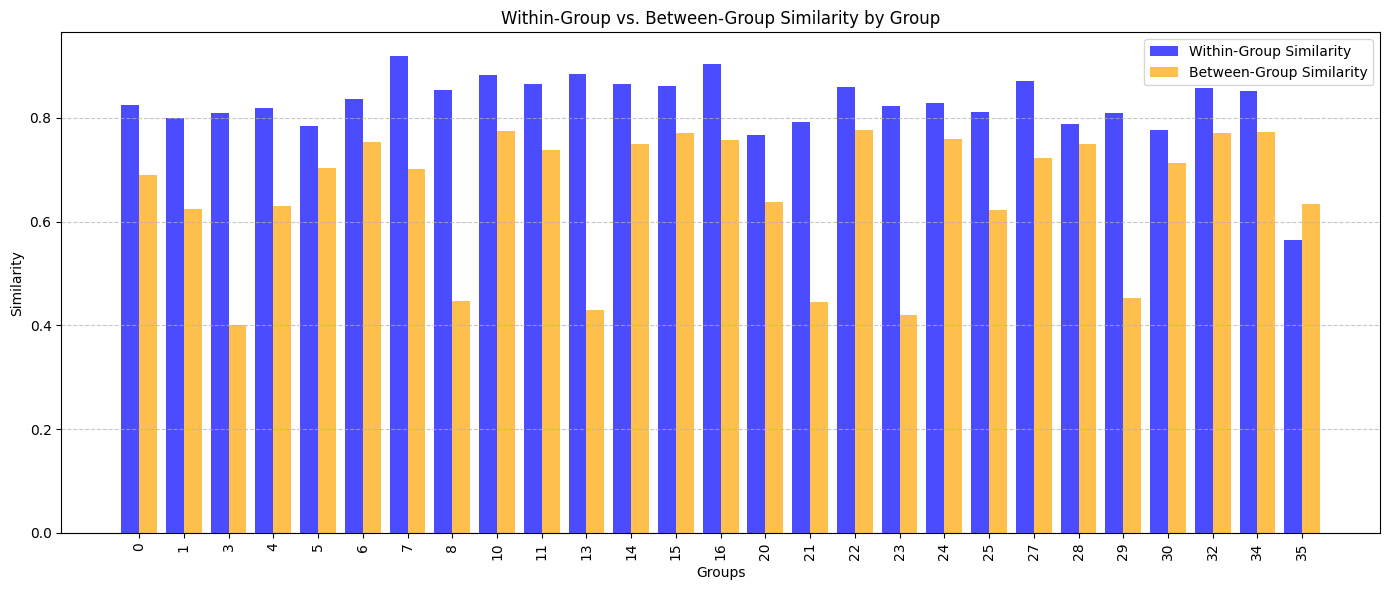

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Data
groups = [0, 1, 3, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 32, 34, 35]
within_similarity = [0.825, 0.799, 0.809, 0.819, 0.785, 0.836, 0.919, 0.853, 0.883, 0.865, 0.884, 0.866, 0.861, 0.903, 0.768, 0.793, 0.860, 0.823, 0.829, 0.811, 0.871, 0.788, 0.809, 0.776, 0.858, 0.852, 0.564]
between_similarity = [0.690, 0.624, 0.400, 0.631, 0.703, 0.753, 0.702, 0.448, 0.775, 0.738, 0.429, 0.749, 0.770, 0.757, 0.637, 0.445, 0.776, 0.421, 0.759, 0.623, 0.722, 0.750, 0.453, 0.713, 0.770, 0.772, 0.635]

x = np.arange(len(groups))

# Plot
plt.figure(figsize=(14, 6))
plt.bar(x - 0.2, within_similarity, 0.4, label='Within-Group Similarity', color='blue', alpha=0.7)
plt.bar(x + 0.2, between_similarity, 0.4, label='Between-Group Similarity', color='orange', alpha=0.7)

# Formatting
plt.title('Within-Group vs. Between-Group Similarity by Group')
plt.xlabel('Groups')
plt.ylabel('Similarity')
plt.xticks(x, groups, rotation=90)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

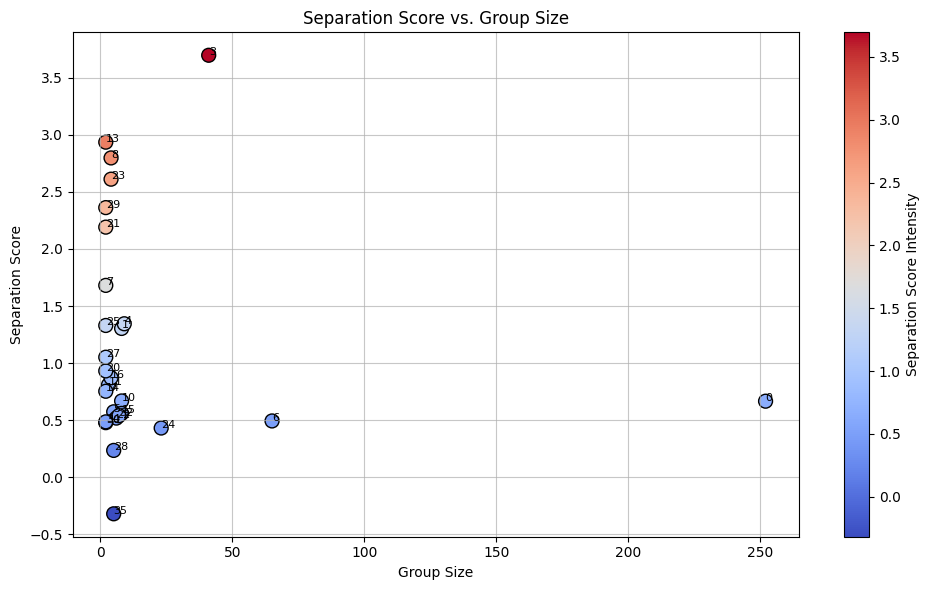

In [23]:
# Data
group_sizes = [252, 8, 41, 9, 5, 65, 2, 4, 8, 3, 2, 2, 8, 4, 2, 2, 6, 4, 23, 2, 2, 5, 2, 2, 7, 2, 5]
separation_scores = [0.667, 1.304, 3.696, 1.345, 0.574, 0.494, 1.681, 2.797, 0.669, 0.808, 2.935, 0.754, 0.560, 0.872, 0.932, 2.191, 0.519, 2.611, 0.432, 1.330, 1.052, 0.236, 2.362, 0.479, 0.540, 0.486, -0.319]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(group_sizes, separation_scores, c=separation_scores, cmap='coolwarm', s=100, edgecolors='k')
for i, group in enumerate(groups):
    plt.annotate(group, (group_sizes[i], separation_scores[i]), fontsize=8)

# Formatting
plt.title('Separation Score vs. Group Size')
plt.xlabel('Group Size')
plt.ylabel('Separation Score')
plt.colorbar(label='Separation Score Intensity')
plt.grid(alpha=0.7)
plt.tight_layout()
plt.show()

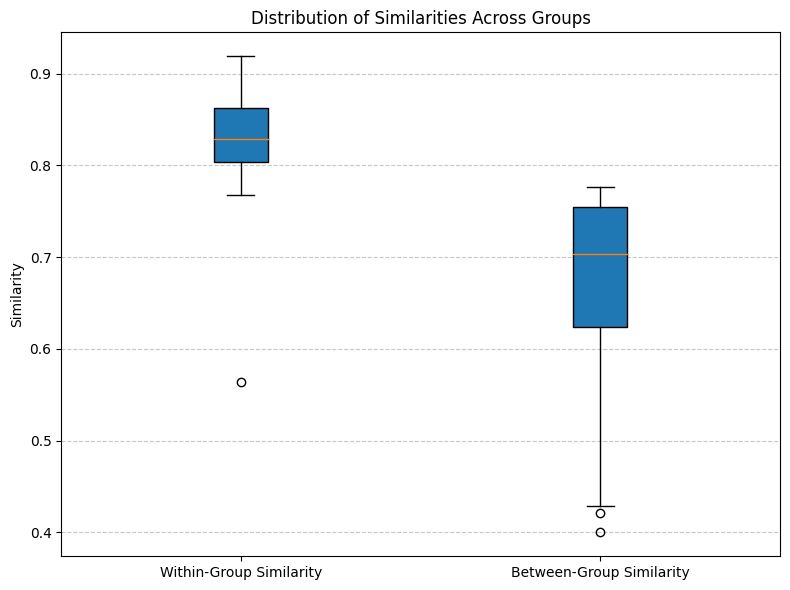

In [24]:
# Box plot data
data = [within_similarity, between_similarity]

# Plot
plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=['Within-Group Similarity', 'Between-Group Similarity'], patch_artist=True)
plt.title('Distribution of Similarities Across Groups')
plt.ylabel('Similarity')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [26]:
def validate_behavioral_groups(similarity_computer, family_distributions, behavioral_groups):
    """
    Validate behavioral groups by analyzing their composition along the same
    dimensions used to create them.
    """
    results = {}
    
    # 1. Analyze component-wise separation
    def compute_component_separation(profile1, profile2):
        """Compute separation for each component of similarity."""
        # Feature distribution similarity
        feat_sim = similarity_computer._compare_feature_distributions(
            profile1['feature_stats'], 
            profile2['feature_stats']
        )
        
        # Behavior pattern similarity
        pattern_sim = similarity_computer._compare_pattern_vectors(
            profile1['behavior_patterns'],
            profile2['behavior_patterns']
        )
        
        # Local structure similarity
        struct_sim = similarity_computer._compare_pattern_vectors(
            profile1['local_structures'],
            profile2['local_structures']
        )
        
        return {
            'feature_sim': feat_sim if feat_sim is not None else 0,
            'pattern_sim': pattern_sim if pattern_sim is not None else 0,
            'struct_sim': struct_sim if struct_sim is not None else 0
        }
    
    # 2. Analyze each group's component-wise cohesion
    group_analysis = {}
    for group_id, families in behavioral_groups.items():
        if len(families) < 2:
            continue
            
        # Within-group component similarities
        within_components = {
            'feature_sims': [],
            'pattern_sims': [],
            'struct_sims': []
        }
        
        # Between-group component similarities
        between_components = {
            'feature_sims': [],
            'pattern_sims': [],
            'struct_sims': []
        }
        
        # Compute within-group similarities
        for i, fam1 in enumerate(families):
            for fam2 in families[i+1:]:
                if fam1 in family_distributions and fam2 in family_distributions:
                    sims = compute_component_separation(
                        family_distributions[fam1],
                        family_distributions[fam2]
                    )
                    within_components['feature_sims'].append(sims['feature_sim'])
                    within_components['pattern_sims'].append(sims['pattern_sim'])
                    within_components['struct_sims'].append(sims['struct_sim'])
        
        # Compute between-group similarities
        other_families = [f for g, fs in behavioral_groups.items() 
                         if g != group_id for f in fs]
        for fam1 in families:
            if fam1 not in family_distributions:
                continue
            for fam2 in other_families:
                if fam2 not in family_distributions:
                    continue
                sims = compute_component_separation(
                    family_distributions[fam1],
                    family_distributions[fam2]
                )
                between_components['feature_sims'].append(sims['feature_sim'])
                between_components['pattern_sims'].append(sims['pattern_sim'])
                between_components['struct_sims'].append(sims['struct_sim'])
        
        # Calculate statistics
        group_analysis[group_id] = {
            'size': len(families),
            'components': {
                'features': {
                    'within_mean': np.mean(within_components['feature_sims']),
                    'within_std': np.std(within_components['feature_sims']),
                    'between_mean': np.mean(between_components['feature_sims']),
                    'between_std': np.std(between_components['feature_sims']),
                    'separation': (np.mean(within_components['feature_sims']) - 
                                 np.mean(between_components['feature_sims'])) / \
                                np.std(between_components['feature_sims'])
                },
                'patterns': {
                    'within_mean': np.mean(within_components['pattern_sims']),
                    'within_std': np.std(within_components['pattern_sims']),
                    'between_mean': np.mean(between_components['pattern_sims']),
                    'between_std': np.std(between_components['pattern_sims']),
                    'separation': (np.mean(within_components['pattern_sims']) - 
                                 np.mean(between_components['pattern_sims'])) / \
                                np.std(between_components['pattern_sims'])
                },
                'structures': {
                    'within_mean': np.mean(within_components['struct_sims']),
                    'within_std': np.std(within_components['struct_sims']),
                    'between_mean': np.mean(between_components['struct_sims']),
                    'between_std': np.std(between_components['struct_sims']),
                    'separation': (np.mean(within_components['struct_sims']) - 
                                 np.mean(between_components['struct_sims'])) / \
                                np.std(between_components['struct_sims'])
                }
            }
        }
    
    results['group_analysis'] = group_analysis
    
    # Plot component-wise separations
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    components = ['features', 'patterns', 'structures']
    
    for idx, component in enumerate(components):
        groups = []
        within_means = []
        between_means = []
        sizes = []
        
        for group_id, analysis in group_analysis.items():
            groups.append(group_id)
            stats = analysis['components'][component]
            within_means.append(stats['within_mean'])
            between_means.append(stats['between_mean'])
            sizes.append(analysis['size'])
        
        # Create scatter plot
        axes[idx].scatter(within_means, between_means, s=[50*s for s in sizes], alpha=0.6)
        
        # Add diagonal line
        max_val = max(max(within_means), max(between_means))
        min_val = min(min(within_means), min(between_means))
        axes[idx].plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.3)
        
        axes[idx].set_xlabel('Within-Group Similarity')
        axes[idx].set_ylabel('Between-Group Similarity')
        axes[idx].set_title(f'{component.title()} Component')
        axes[idx].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('component_separation.png')
    plt.close()
    
    # Print summary
    print("\nBehavioral Group Validation Summary:")
    for group_id, analysis in sorted(group_analysis.items()):
        print(f"\nGroup {group_id} ({analysis['size']} families):")
        print("Component-wise separation (higher is better):")
        for component, stats in analysis['components'].items():
            print(f"- {component.title()}: {stats['separation']:.3f}")
            if stats['separation'] > 1:
                print(f"  * Strong separation in {component}")
            elif stats['separation'] > 0:
                print(f"  * Moderate separation in {component}")
    
    return results

validation_results = validate_behavioral_groups(
    similarity_computer, 
    aggregator.family_distributions, 
    behavioral_groups
)



Behavioral Group Validation Summary:

Group 0 (252 families):
Component-wise separation (higher is better):
- Features: 0.416
  * Moderate separation in features
- Patterns: 0.603
  * Moderate separation in patterns
- Structures: 0.029
  * Moderate separation in structures

Group 1 (8 families):
Component-wise separation (higher is better):
- Features: 4.050
  * Strong separation in features
- Patterns: 0.389
  * Moderate separation in patterns
- Structures: -0.188

Group 10 (8 families):
Component-wise separation (higher is better):
- Features: 0.783
  * Moderate separation in features
- Patterns: 0.389
  * Moderate separation in patterns
- Structures: 0.531
  * Moderate separation in structures

Group 11 (3 families):
Component-wise separation (higher is better):
- Features: 1.511
  * Strong separation in features
- Patterns: 0.386
  * Moderate separation in patterns
- Structures: 0.202
  * Moderate separation in structures

Group 13 (2 families):
Component-wise separation (higher i

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import json
from collections import defaultdict

def calculate_pattern_consistency(distributions):
    """
    Calculate how consistent a pattern is across distributions.
    Returns a value between 0 and 1.
    """
    if len(distributions) < 2:
        return 0
        
    distributions = np.array(distributions)
    
    # Calculate pairwise differences between distributions
    diff_matrix = np.zeros((len(distributions), len(distributions)))
    for i in range(len(distributions)):
        for j in range(i+1, len(distributions)):
            # Use Jensen-Shannon distance for probability distributions
            m = 0.5 * (distributions[i] + distributions[j])
            # Add small epsilon to avoid log(0)
            eps = 1e-10
            d1 = distributions[i] * np.log((distributions[i] + eps) / (m + eps))
            d2 = distributions[j] * np.log((distributions[j] + eps) / (m + eps))
            js_dist = 0.5 * (np.sum(d1) + np.sum(d2))
            # Convert to a similarity score
            similarity = 1 / (1 + js_dist)
            diff_matrix[i,j] = diff_matrix[j,i] = similarity
    
    # Average similarity
    consistency = np.mean(diff_matrix[np.triu_indices_from(diff_matrix, k=1)])
    
    print(f"Debug - num distributions: {len(distributions)}")
    print(f"Debug - sample similarities: {diff_matrix[0,1:5] if len(diff_matrix) > 5 else diff_matrix[0,:]}")
    print(f"Debug - final consistency: {consistency}")
    
    return consistency

def analyze_group_patterns():
    # Load behavioral groups
    output_dir = Path('/data/saranyav/gcn_new/behavioral_analysis')
    with open(output_dir / 'behavioral_groups.json', 'r') as f:
        behavioral_groups = json.load(f)
    
    # Initialize aggregator to get family distributions
    aggregator = MalwareBehaviorAggregator(Path('/data/saranyav/gcn_new/bodmas_batches'))
    aggregator.load_processed_batches(split='train')
    aggregator.process_families()
    
    group_patterns = {}
    pattern_features = [
        'external_calls', 'mem_reads', 'mem_writes', 'is_conditional', 'has_jump',
        'stack_ops', 'reg_writes', 'internal_calls'
    ]
    
    print("\nAnalyzing patterns for each group...")
    for group_id, families in behavioral_groups.items():
        print(f"\nProcessing Group {group_id}")
        valid_families = [f for f in families if f in aggregator.family_distributions]
        if not valid_families:
            continue
            
        group_features = defaultdict(list)
        
        for family in valid_families:
            family_dist = aggregator.family_distributions[family]
            feature_stats = family_dist['feature_stats']
            
            for feature in pattern_features:
                if feature in feature_stats:
                    hist = feature_stats[feature]['histogram']
                    # Normalize histogram to make it a probability distribution
                    hist = np.array(hist)
                    hist = hist / np.sum(hist) if np.sum(hist) > 0 else hist
                    group_features[feature].append(hist)
        
        pattern_stats = {}
        for feature, distributions in group_features.items():
            print(f"\nAnalyzing feature {feature} in Group {group_id}")
            consistency = calculate_pattern_consistency(distributions)
            
            pattern_stats[feature] = {
                'mean': np.mean(distributions, axis=0),
                'consistency': consistency,
                'n_samples': len(distributions)
            }
        
        group_patterns[group_id] = {
            'size': len(valid_families),
            'patterns': pattern_stats
        }
    
    return group_patterns

def plot_pattern_consistency(group_patterns):
    significant_groups = {k: v for k, v in group_patterns.items() if v['size'] >= 5}
    
    if not significant_groups:
        print("No groups with sufficient samples found")
        return
        
    groups = list(significant_groups.keys())
    features = list(next(iter(significant_groups.values()))['patterns'].keys())
    
    plt.figure(figsize=(15, 8))
    
    x = np.arange(len(groups))
    width = 0.8 / len(features)
    
    for i, feature in enumerate(features):
        consistencies = [significant_groups[g]['patterns'][feature]['consistency'] 
                        for g in groups]
        
        plt.bar(x + i*width - width*len(features)/2, 
               consistencies,
               width,
               label=feature.replace('_', ' ').title(),
               alpha=0.7)
    
    plt.xlabel('Behavioral Group', fontsize=12)
    plt.ylabel('Pattern Consistency (0-1)', fontsize=12)
    plt.title('Pattern Consistency Across Behavioral Groups', fontsize=14, pad=20)
    
    group_sizes = [f"Group {g}\n({significant_groups[g]['size']} families)" 
                  for g in groups]
    plt.xticks(x, group_sizes, rotation=45, ha='right')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('pattern_consistency_fixed.png', dpi=300, bbox_inches='tight')
    plt.close()

print("Running pattern analysis with debug info...")
group_patterns = analyze_group_patterns()

print("\nSample consistency values:")
for group_id, data in list(group_patterns.items())[:3]:
    print(f"\nGroup {group_id} ({data['size']} families)")
    for feature, stats in list(data['patterns'].items())[:3]:
        print(f"{feature}: {stats['consistency']:.3f}")

plot_pattern_consistency(group_patterns)

2025-01-06 01:15:31,033 - INFO - Loading batches from /data/saranyav/gcn_new/bodmas_batches/train


Running pattern analysis with debug info...


Loading batches:   0%|          | 0/352 [00:00<?, ?it/s]/data/saranyav/gcn_new/Processing/family_aggregator.py:407: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  batch_graph

Number of family_distributions
488
Number of family_graphs
488

Analyzing patterns for each group...

Processing Group 4

Analyzing feature external_calls in Group 4
Debug - num distributions: 9
Debug - sample similarities: [1. 1. 1. 1.]
Debug - final consistency: 1.0

Analyzing feature mem_reads in Group 4
Debug - num distributions: 9
Debug - sample similarities: [1. 1. 1. 1.]
Debug - final consistency: 0.999999992534109

Analyzing feature mem_writes in Group 4
Debug - num distributions: 9
Debug - sample similarities: [1.         1.         1.         0.99999999]
Debug - final consistency: 0.9999999961290098

Analyzing feature is_conditional in Group 4
Debug - num distributions: 9
Debug - sample similarities: [0.99999999 1.         1.         1.        ]
Debug - final consistency: 0.9999999900059847

Analyzing feature has_jump in Group 4
Debug - num distributions: 9
Debug - sample similarities: [1. 1. 1. 1.]
Debug - final consistency: 1.0

Analyzing feature stack_ops in Group 4
Debug 

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from collections import defaultdict
from typing import Dict, List, Tuple
import logging

logger = logging.getLogger(__name__)

def analyze_feature_evolution(family_distributions: Dict, time_periods: List[str]) -> Dict:
    """
    Track changes in specific behavioral features over time periods.
    
    Args:
        family_distributions: Dict of family behavioral profiles
        time_periods: List of time period identifiers
    
    Returns:
        Dict containing feature trends and statistical analysis
    """
    feature_trends = defaultdict(dict)
    key_features = ['external_calls', 'mem_writes', 'is_conditional', 'has_jump']
    
    for feature in key_features:
        feature_values = defaultdict(list)
        
        # Collect feature values across time periods
        for period in time_periods:
            period_values = []
            for family, dist in family_distributions.items():
                if period in dist.get('time_period', []):
                    try:
                        hist = np.array(dist['feature_stats'][feature]['histogram'])
                        # Use weighted average for feature value
                        feature_val = np.average(np.arange(len(hist)), weights=hist)
                        period_values.append(feature_val)
                    except (KeyError, ValueError) as e:
                        logger.warning(f"Error processing {family} for {feature}: {e}")
                        continue
            
            feature_values[period] = period_values
        
        # Calculate statistics and trends
        means = [np.mean(vals) for vals in feature_values.values()]
        stds = [np.std(vals) for vals in feature_values.values()]
        
        # Perform trend analysis
        if len(means) > 2:
            slope, intercept, r_value, p_value, _ = stats.linregress(
                range(len(means)), means
            )
        else:
            slope = p_value = r_value = 0
            
        feature_trends[feature] = {
            'means': means,
            'stds': stds,
            'trend': {
                'slope': slope,
                'p_value': p_value,
                'r_squared': r_value**2
            }
        }
        
        # Plot feature evolution
        plt.figure(figsize=(10, 6))
        plt.errorbar(time_periods, means, yerr=stds, marker='o', capsize=5)
        plt.title(f'Evolution of {feature.replace("_", " ").title()}')
        plt.xlabel('Time Period')
        plt.ylabel('Feature Value')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig(f'feature_evolution_{feature}.png', dpi=300)
        plt.close()
    
    return feature_trends

def analyze_behavioral_drift(
    similarity_computer: object,
    family_distributions: Dict,
    time_windows: List[Tuple[str, str]]
) -> Dict:
    """
    Track how malware behavior changes over time by measuring
    behavioral similarity between consecutive time windows.
    
    Args:
        similarity_computer: Instance of BehavioralSimilarityComputer
        family_distributions: Dict of family behavioral profiles
        time_windows: List of (start, end) period tuples
    
    Returns:
        Dict containing drift metrics and analysis
    """
    drift_metrics = defaultdict(list)
    
    # Track drift for each family across time windows
    for family in family_distributions:
        window_similarities = []
        
        for i in range(len(time_windows) - 1):
            window1, window2 = time_windows[i], time_windows[i+1]
            
            try:
                profile1 = family_distributions[family].get(window1[0], {})
                profile2 = family_distributions[family].get(window2[0], {})
                
                if profile1 and profile2:
                    sim = similarity_computer.compute_similarity(profile1, profile2)
                    window_similarities.append(sim)
            except Exception as e:
                logger.warning(f"Error computing drift for {family}: {e}")
                continue
                
        if window_similarities:
            drift_metrics['family_drifts'].append({
                'family': family,
                'mean_drift': np.mean(window_similarities),
                'std_drift': np.std(window_similarities),
                'drift_values': window_similarities
            })
    
    # Plot overall drift distribution
    all_drifts = [m['mean_drift'] for m in drift_metrics['family_drifts']]
    plt.figure(figsize=(10, 6))
    plt.hist(all_drifts, bins=20, edgecolor='black')
    plt.title('Distribution of Behavioral Drift Across Families')
    plt.xlabel('Mean Behavioral Similarity Between Consecutive Windows')
    plt.ylabel('Number of Families')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('behavioral_drift_dist.png', dpi=300)
    plt.close()
    
    return drift_metrics

def analyze_group_stability(
    similarity_computer: object,
    family_distributions: Dict,
    behavioral_groups: Dict,
    n_perturbations: int = 100
) -> Dict:
    """
    Show that group assignments remain stable with small perturbations
    to the similarity computation.
    
    Args:
        similarity_computer: Instance of BehavioralSimilarityComputer
        family_distributions: Dict of family behavioral profiles
        behavioral_groups: Dict of group assignments
        n_perturbations: Number of perturbation trials
    
    Returns:
        Dict containing stability metrics
    """
    stability_metrics = defaultdict(list)
    
    # Function to compute perturbed similarities
    def compute_perturbed_similarities(noise_level: float = 0.1) -> np.ndarray:
        n_families = len(family_distributions)
        sim_matrix = np.zeros((n_families, n_families))
        
        families = list(family_distributions.keys())
        for i, fam1 in enumerate(families):
            for j, fam2 in enumerate(families):
                if i != j:
                    base_sim = similarity_computer.compute_similarity(
                        family_distributions[fam1],
                        family_distributions[fam2]
                    )
                    # Add random noise
                    noise = np.random.normal(0, noise_level)
                    sim_matrix[i,j] = max(0, min(1, base_sim + noise))
        
        return sim_matrix
    
    # Track group stability across perturbations
    original_groups = {f: g for g, families in behavioral_groups.items() 
                      for f in families}
    
    for trial in range(n_perturbations):
        perturbed_matrix = compute_perturbed_similarities()
        
        # Compute group assignments with perturbed similarities
        from sklearn.cluster import AgglomerativeClustering
        clustering = AgglomerativeClustering(
            n_clusters=len(behavioral_groups),
            metric='precomputed',
            linkage='average'
        )
        
        # Convert similarities to distances
        distance_matrix = 1 - perturbed_matrix
        labels = clustering.fit_predict(distance_matrix)
        
        # Compare with original grouping
        families = list(family_distributions.keys())
        agreement = 0
        for i, fam1 in enumerate(families):
            for j, fam2 in enumerate(families):
                if i != j:
                    # Check if pair assignment remains same
                    orig_same_group = (original_groups[fam1] == original_groups[fam2])
                    pert_same_group = (labels[i] == labels[j])
                    if orig_same_group == pert_same_group:
                        agreement += 1
        
        stability_metrics['agreement_scores'].append(
            agreement / (len(families) * (len(families) - 1))
        )
    
    # Plot stability results
    plt.figure(figsize=(10, 6))
    plt.hist(stability_metrics['agreement_scores'], bins=20, edgecolor='black')
    plt.title('Distribution of Group Assignment Stability')
    plt.xlabel('Agreement Score')
    plt.ylabel('Number of Perturbation Trials')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('group_stability_dist.png', dpi=300)
    plt.close()
    
    return stability_metrics

def analyze_group_cohesion(
    similarity_computer: object,
    family_distributions: Dict,
    behavioral_groups: Dict
) -> Tuple[List[float], List[float]]:
    """
    Compare within-group similarities to between-group similarities.
    
    Args:
        similarity_computer: Instance of BehavioralSimilarityComputer
        family_distributions: Dict of family behavioral profiles
        behavioral_groups: Dict of group assignments
    
    Returns:
        Tuple of (intra_group_similarities, inter_group_similarities)
    """
    intra_group_sims = []  # similarities within groups
    inter_group_sims = []  # similarities between groups
    
    # Compute similarities for each pair of families
    for group1_id, group1_families in behavioral_groups.items():
        for group2_id, group2_families in behavioral_groups.items():
            for fam1 in group1_families:
                for fam2 in group2_families:
                    if fam1 != fam2:
                        try:
                            sim = similarity_computer.compute_similarity(
                                family_distributions[fam1],
                                family_distributions[fam2]
                            )
                            
                            if group1_id == group2_id:
                                intra_group_sims.append(sim)
                            else:
                                inter_group_sims.append(sim)
                        except Exception as e:
                            logger.warning(f"Error computing similarity for {fam1}-{fam2}: {e}")
                            continue
    
    # Plot cohesion comparison
    plt.figure(figsize=(10, 6))
    plt.hist(intra_group_sims, bins=20, alpha=0.5, label='Within-Group', 
             edgecolor='black')
    plt.hist(inter_group_sims, bins=20, alpha=0.5, label='Between-Group',
             edgecolor='black')
    plt.title('Distribution of Within-Group vs Between-Group Similarities')
    plt.xlabel('Behavioral Similarity')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('group_cohesion_dist.png', dpi=300)
    plt.close()
    
    # Compute statistical significance
    t_stat, p_value = stats.ttest_ind(intra_group_sims, inter_group_sims)
    logger.info(f"Cohesion t-test: t={t_stat:.3f}, p={p_value:.3f}")
    
    return intra_group_sims, inter_group_sims

In [20]:
def main_analysis():
    """Run comprehensive malware behavior analysis using existing behavioral groups."""
    import json
    from pathlib import Path
    
    # Initialize the aggregator and load data
    aggregator = MalwareBehaviorAggregator(
        batch_dir=Path('/data/saranyav/gcn_new/bodmas_batches')
    )
    
    print("Loading and processing data...")
    aggregator.load_processed_batches(split='train')
    aggregator.process_families()
    
    # Load existing behavioral groups
    groups_path = Path('/data/saranyav/gcn_new/behavioral_analysis/behavioral_groups.json')
    print(f"\nLoading existing behavioral groups from {groups_path}")
    with open(groups_path, 'r') as f:
        behavioral_groups = json.load(f)
    
    print(f"Loaded {len(behavioral_groups)} behavioral groups")
    for group_id, families in behavioral_groups.items():
        print(f"Group {group_id}: {len(families)} families")
    
    # Initialize similarity computer
    similarity_computer = BehavioralSimilarityComputer(aggregator.family_distributions)
    
    # Define time periods for evolution analysis
    # Assuming timestamps are available in the data
    time_periods = ['2020Q1', '2020Q2', '2020Q3', '2020Q4', 
                   '2021Q1', '2021Q2', '2021Q3', '2021Q4']
    time_windows = list(zip(time_periods[:-1], time_periods[1:]))
    
    # 1. Analyze feature evolution
    print("\nAnalyzing feature evolution...")
    feature_trends = analyze_feature_evolution(
        aggregator.family_distributions,
        time_periods
    )
    
    # Print key findings
    print("\nFeature Evolution Summary:")
    for feature, trends in feature_trends.items():
        if trends['trend']['p_value'] < 0.05:  # Significant trend
            print(f"\n{feature}:")
            print(f"- Trend slope: {trends['trend']['slope']:.3f}")
            print(f"- R-squared: {trends['trend']['r_squared']:.3f}")
            print(f"- p-value: {trends['trend']['p_value']:.3f}")
    
    # 2. Analyze behavioral drift
    print("\nAnalyzing behavioral drift...")
    drift_metrics = analyze_behavioral_drift(
        similarity_computer,
        aggregator.family_distributions,
        time_windows
    )
    
    # Print drift statistics
    all_mean_drifts = [m['mean_drift'] for m in drift_metrics['family_drifts']]
    print("\nDrift Analysis Summary:")
    print(f"- Average drift across families: {np.mean(all_mean_drifts):.3f}")
    print(f"- Std deviation of drift: {np.std(all_mean_drifts):.3f}")
    
    # 3. Analyze group stability
    print("\nAnalyzing group stability...")
    stability_metrics = analyze_group_stability(
        similarity_computer,
        aggregator.family_distributions,
        behavioral_groups
    )
    
    # Print stability results
    agreement_scores = stability_metrics['agreement_scores']
    print("\nStability Analysis Summary:")
    print(f"- Mean agreement score: {np.mean(agreement_scores):.3f}")
    print(f"- Min agreement score: {np.min(agreement_scores):.3f}")
    print(f"- Max agreement score: {np.max(agreement_scores):.3f}")
    
    # 4. Analyze group cohesion
    print("\nAnalyzing group cohesion...")
    intra_sims, inter_sims = analyze_group_cohesion(
        similarity_computer,
        aggregator.family_distributions,
        behavioral_groups
    )
    
    # Print cohesion statistics
    print("\nCohesion Analysis Summary:")
    print(f"- Mean within-group similarity: {np.mean(intra_sims):.3f}")
    print(f"- Mean between-group similarity: {np.mean(inter_sims):.3f}")
    print(f"- Similarity ratio (within/between): {np.mean(intra_sims)/np.mean(inter_sims):.3f}")
    
    # Statistical test for cohesion
    t_stat, p_value = stats.ttest_ind(intra_sims, inter_sims)
    print(f"- T-statistic: {t_stat:.3f}")
    print(f"- p-value: {p_value:.3f}")
    
    # Show all plots (for notebook environment)
    plt.show()
    
    return {
        'feature_trends': feature_trends,
        'drift_metrics': drift_metrics,
        'stability_metrics': stability_metrics,
        'cohesion_metrics': {
            'intra_group': intra_sims,
            'inter_group': inter_sims
        }
    }

# Example usage in notebook:
results = main_analysis()

# Access specific results:
feature_trends = results['feature_trends']
drift_metrics = results['drift_metrics']
stability_metrics = results['stability_metrics']
cohesion_metrics = results['cohesion_metrics']

2025-01-06 01:23:15,608 - INFO - Loading batches from /data/saranyav/gcn_new/bodmas_batches/train


Loading and processing data...


Loading batches: 100%|██████████| 352/352 [00:13<00:00, 25.22it/s]
2025-01-06 01:23:29,569 - INFO - Loaded 488 families
2025-01-06 01:23:29,569 - INFO - 
Malware type distribution:
2025-01-06 01:23:29,570 - INFO - trojan: 311 families
2025-01-06 01:23:29,570 - INFO - worm: 77 families
2025-01-06 01:23:29,570 - INFO - backdoor: 32 families
2025-01-06 01:23:29,570 - INFO - ransomware: 16 families
2025-01-06 01:23:29,570 - INFO - informationstealer: 15 families
2025-01-06 01:23:29,571 - INFO - dropper: 10 families
2025-01-06 01:23:29,571 - INFO - downloader: 10 families
2025-01-06 01:23:29,571 - INFO - virus: 7 families
2025-01-06 01:23:29,571 - INFO - pua: 5 families
2025-01-06 01:23:29,571 - INFO - cryptominer: 2 families
2025-01-06 01:23:29,571 - INFO - trojan-gamethief: 1 families
2025-01-06 01:23:29,572 - INFO - exploit: 1 families
2025-01-06 01:23:29,572 - INFO - rootkit: 1 families
2025-01-06 01:23:29,572 - INFO - Processing family behaviors...
Processing families: 100%|██████████|

Number of family_distributions
488
Number of family_graphs
488

Loading existing behavioral groups from /data/saranyav/gcn_new/behavioral_analysis/behavioral_groups.json
Loaded 38 behavioral groups
Group 4: 9 families
Group 0: 252 families
Group 1: 8 families
Group 3: 41 families
Group 2: 1 families
Group 5: 5 families
Group 6: 65 families
Group 7: 2 families
Group 9: 1 families
Group 8: 4 families
Group 10: 8 families
Group 12: 1 families
Group 11: 3 families
Group 13: 2 families
Group 14: 2 families
Group 15: 8 families
Group 18: 1 families
Group 19: 1 families
Group 17: 1 families
Group 16: 4 families
Group 20: 2 families
Group 22: 6 families
Group 21: 2 families
Group 24: 23 families
Group 25: 2 families
Group 27: 2 families
Group 23: 4 families
Group 26: 1 families
Group 28: 5 families
Group 29: 2 families
Group 32: 7 families
Group 31: 1 families
Group 30: 2 families
Group 33: 1 families
Group 34: 2 families
Group 35: 5 families
Group 36: 1 families
Group 37: 1 families

Analyzin

2025-01-06 02:03:18,041 - INFO - Cohesion t-test: t=199.932, p=0.000



Cohesion Analysis Summary:
- Mean within-group similarity: 0.825
- Mean between-group similarity: 0.663
- Similarity ratio (within/between): 1.244
- T-statistic: 199.932
- p-value: 0.000


In [ ]:
i suspect also that the behavioral groups indicate that some 1-sample classes (for example) should really be considered some other class since the classes are manually created by malware analysts. i sort of want to prove that type of thing. 